# Visualization with Seaborn

There are several valid complaitns about Matploblit that often come up:

- Defaults are not exaclty the best choices.
- Is relatively low level. Doing sophisticated statistical visualization is poissible, but requires a *lot* of boiler plate code.
- Is not designed for use with `DataFrame`s. In order to visualize data from Pandas you must extract each `Series` and often concatenate them together into the right format.

The answer to these problems is Seaborn. Seaborn provides an API on top of Matplotlib.
Matplotlib is addresing this: it has recently added in `plt.style` but SEaborn remains an extremely useful addon.

## Seaborn versus Matpltotlib

Here is an example ofa simple random-walk plot in Matplotlib, using tis classic plot formatting and colors. WE start with the typical imports:

In [1]:
import matplotlib.pyplot as plt 
plt.style.use('classic')
%matplotlib inline 
import numpy as np 
import pandas as pd

Now we create some random walk data:

In [2]:
# Create some data 
rng = np.random.RandomState(0)
x = np.linspace(0, 10, 500)
y = np.cumsum(rng.randn(500, 6), 0)

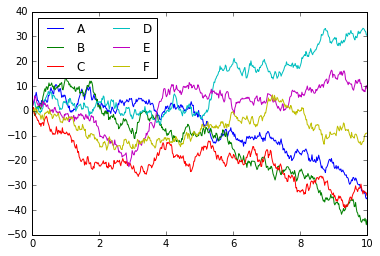

In [3]:
# Plot the data with Matplotlib defaults

plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left');

Although the result contains all the information we'd like it to convey, it does so in a way that iis not all that awsthetically pleasing, and even looks a bit old-fashioned in the context of 21st-century data visualization.

Now let's take a look at how it works with Seaborn. As we will see, Seaborn has many of its own high-level plotting routines, but it can also overwrite Matplotlib's default parameters ad in turn get even simple Matplotlib scripts to produce vastly superior output. We can set the style by calling Seaborn's `set()` method. By convention, Seaborn is imported as `sns`:

In [5]:
import seaborn as sns 
sns.set()

Now let's return the same two lines as before:

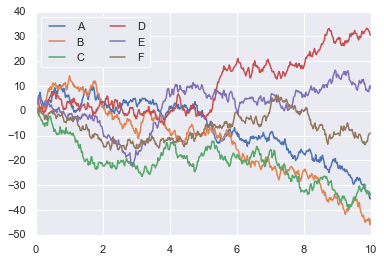

In [6]:
# same plotting code as above!
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left');

Ah, much better!

## Exploring Seaborn Plots

The main idea of Seaborn is that it provides high-level commands to create a variety of plot types useful for statistical data exploration, and even some statistical model fitting.

Let's take a look at a few of the datasets and plot types available in Seaborn. Note that all of the following *could* be done using a raw Matplotlib commands (this is, in fact, what Seaborn does under the hood) but the Seaborn API is much more convenient.

## Histograms, KDE, and densities

Often in statistical data visualization, all you want is to plot histograms and join distributions of variables. We have seen that this is relatively straightforward in Matplotlib:

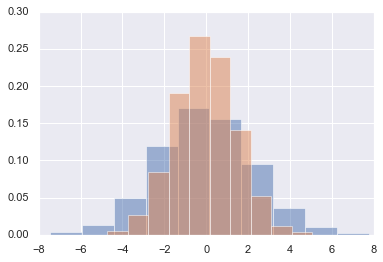

In [8]:
data = np.random.multivariate_normal([0, 0], [[5, 2], [2, 2]], size=2000)
data = pd.DataFrame(data, columns=['x', 'y'])

for col in 'xy':
    plt.hist(data[col], density=True, alpha=0.5)

Rather than a histogram, we can get a smooth estimate of the distrubtion using a kernel density estimation, which Seaborn does with `sns.kdeplot`:

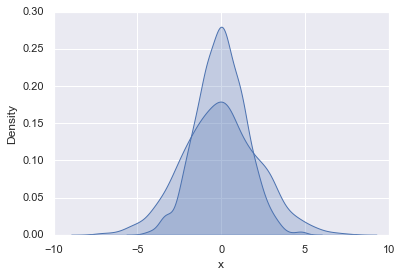

In [21]:
for col in 'xy':
    sns.kdeplot(data=data[col], shade=True)

Histograms and KDE can be combines using `distplot`:

d:\python-datascience-handbook\.env\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
d:\python-datascience-handbook\.env\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


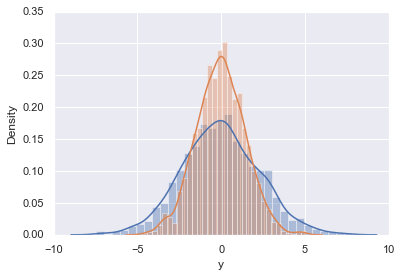

In [14]:
sns.distplot(data['x'])
sns.distplot(data['y']);

If we pass the full two-dimensional dataset to `kdeplot`, we will get a two-dimensional visualizaiton of the data:

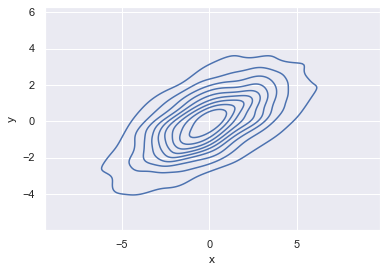

In [24]:
sns.kdeplot(data=data, x='x', y ='y');

We can see the joint distribution adn the marignal distributions together using `sns.jointplot`. For this plot, we'll set the style to a while background:

d:\python-datascience-handbook\.env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


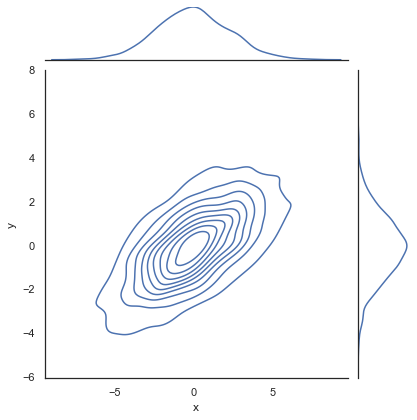

In [25]:
with sns.axes_style('white'):
    sns.jointplot("x", "y", data, kind='kde');

There are other parameters than can be passed to `jointplot` for example, we can use a hexagonally based histogram instead:

d:\python-datascience-handbook\.env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


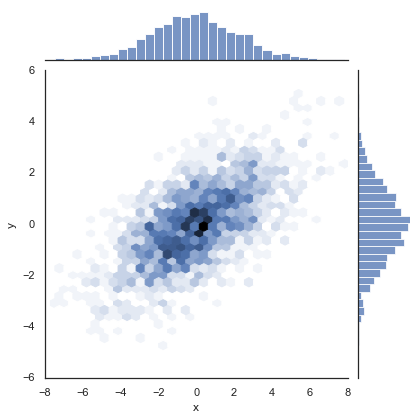

In [26]:
with sns.axes_style('white'):
    sns.jointplot("x", "y", data, kind='hex')

### Pair plots

When yu generalize joint plots to datasets of larger dimensions, you end up with *pair plots*. This is very useful for exploring correlations between multidimensional data, when you'd like to plot all pairs of vlaues against each other.

We'll demo this with the well-known Iris dataset, which lists measureemnts of petals and sepals of three iris species:

In [27]:
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Visualizing the multidimensinal relationships among the samples is as easy as callin `sns.pariplot`:

d:\python-datascience-handbook\.env\lib\site-packages\seaborn\axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


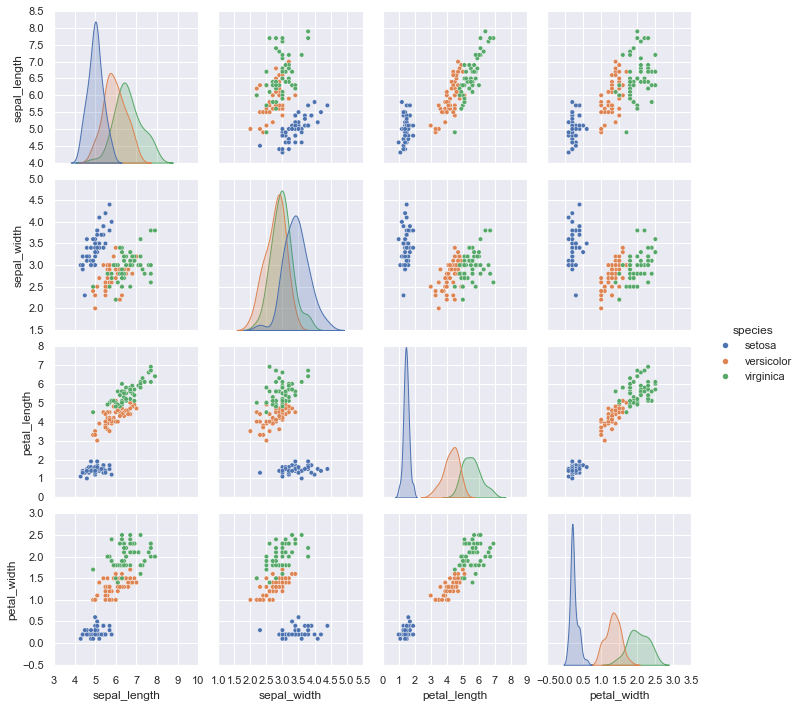

In [28]:
sns.pairplot(iris, hue='species', size=2.5);

### Faceted histograms

Sometimes the best way to view data is via histograms of subsets. Seaborn's `facetGrid` makes this extremely simple. We'll take a look at some data that shows the amount that restaurant staff recieve in tips based on various indicator data:

In [29]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


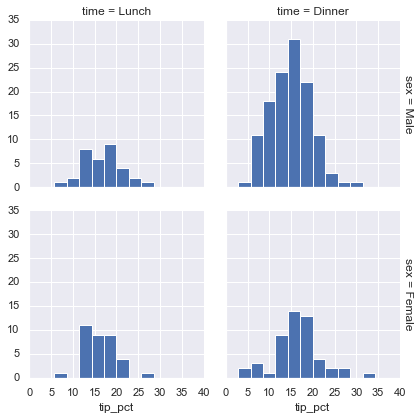

In [30]:
tips['tip_pct'] = 100 * tips['tip'] / tips['total_bill']
grid = sns.FacetGrid(tips, row="sex", col="time", margin_titles=True)
grid.map(plt.hist, "tip_pct", bins=np.linspace(0, 40, 15));

### Factor plots 
FActor plots can be useful for this kind of visualization as well. This allows you to view the distribution of a parameter within bins defined by any other parameter:

d:\python-datascience-handbook\.env\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
d:\python-datascience-handbook\.env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


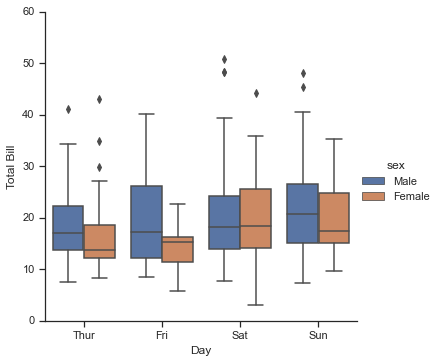

In [31]:
with sns.axes_style(style='ticks'):
    g = sns.factorplot("day", "total_bill", "sex", data=tips, kind="box")
    g.set_axis_labels("Day", "Total Bill");

### Joint distributions
Similar to the pariplot we saw earlier, we can use `sns.jointplot` to show the joint distribution between different datsets, along with the associated marginal distributions:

d:\python-datascience-handbook\.env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


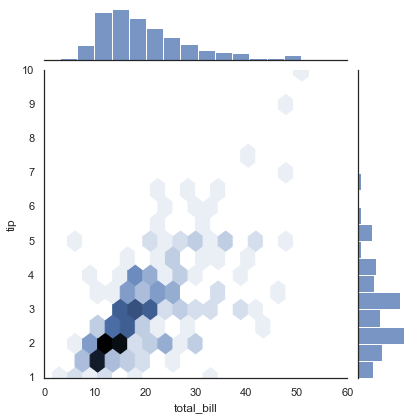

In [44]:
import scipy.stats as stat

with sns.axes_style('white'):
    sns.jointplot("total_bill", "tip", data=tips, kind='hex');

The ojint plot can even do some automatic kernel density estimation and regression:

d:\python-datascience-handbook\.env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


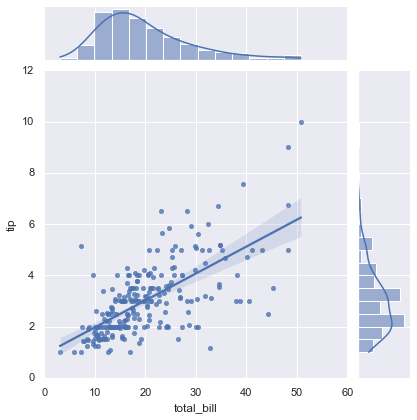

In [45]:
sns.jointplot("total_bill", "tip", data=tips, kind='reg');

### Bar plots

Time series can be plotted using `sns.factorplot`. In the following exmaple, we'll use the Planets data that we first saw.

In [46]:
planets = sns.load_dataset('planets')
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


d:\python-datascience-handbook\.env\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
d:\python-datascience-handbook\.env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


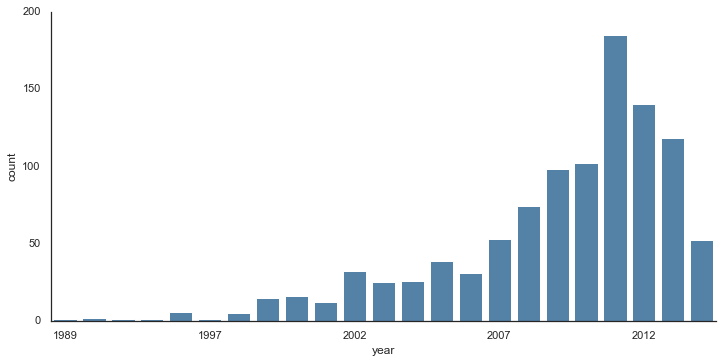

In [47]:
with sns.axes_style('white'):
    g = sns.factorplot('year', data=planets, aspect=2, kind="count", color='steelblue')
    g.set_xticklabels(step=5)

We can learn more by looking at he *method* of discovery of each of these planets:

d:\python-datascience-handbook\.env\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
d:\python-datascience-handbook\.env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


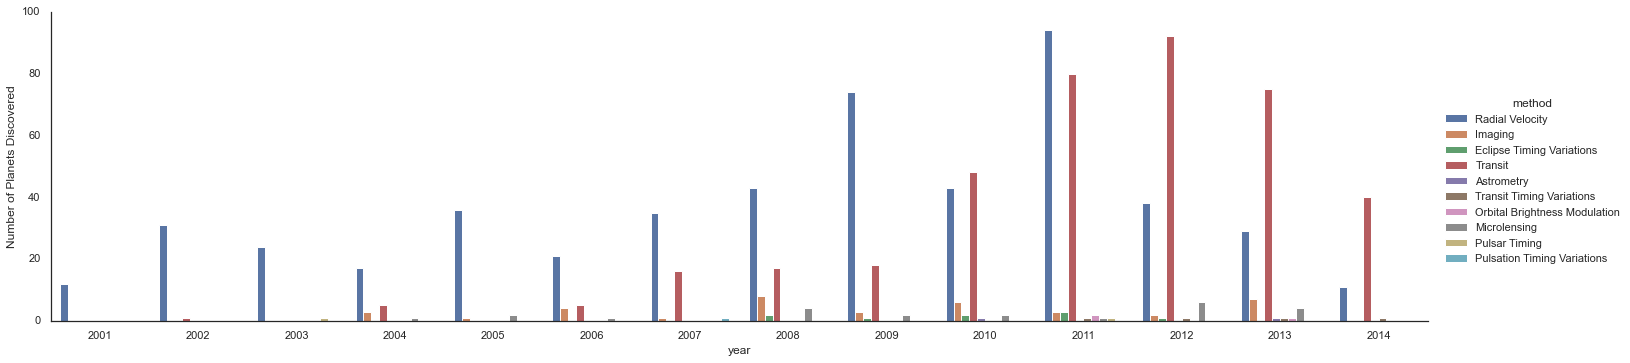

In [48]:
with sns.axes_style('white'):
    g = sns.factorplot("year", data=planets, aspect=4.0, kind='count', hue='method', order=range(2001, 2015))
    g.set_ylabels('Number of Planets Discovered')